# Python Data Science with Pandas

Agenda:
1. Selecting and slicing data with loc and iloc
2. Selecting data by value
3. Selecting data from a time series by date and time values
4. Applying and mapping functions to pandas dataframes and series

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [2]:
# Operation                       Syntax         Result
#----------------------------------------------------------
# Select column                   df[col]        Series
# Select row by label             df.loc[label]  Series
# Select row by integer location  df.iloc[loc]   Series
# Slice rows                      df[5:10]       DataFrame
# Select rows by boolean vector   df[bool_vec]   DataFrame

In [3]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


With Python strings and lists, you can access individual elements inside the object by indexing or slicing with square brackets like my_list[0]. The same syntax works on pandas dataframes and series.

In [4]:
# get a column from the dataframe by its label with [] indexing - returns column as a pandas series with the dataframe's index
df['city'].head()

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

You can slice a pandas dataframe to grab multiple columns or rows at once, by their index, just like you can slice a list or a string. Here, we just pass a list of 2 column names in:

In [5]:
# get multiple columns by their labels by passing a list of column names within the [] operator - returns a dataframe
df[['city', 'country']].head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [6]:
# get a value using the [] operator for a column label then a row label
df['city'][0]

'West Drayton'

### Using .loc[ ]

In [7]:
# use .loc to select by row label - returns the row as a series whose index is the dataframe column labels
df.loc[0]

lat                 51.4813
lon               -0.451011
date       05/14/2014 09:07
city           West Drayton
country      United Kingdom
Name: 0, dtype: object

In [8]:
# use .loc to select by row label and column label
df.loc[0, 'country']

'United Kingdom'

In [9]:
# 0:3 is a slice of rows with label 0 to label 3
# ['city', 'date'] is a list of column labels
df.loc[0:3, ['city', 'date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


In [10]:
# slice by rows and columns
df.loc[0:3, 'date':'country']

,date,city,country
0,05/14/2014 09:07,West Drayton,United Kingdom
1,05/14/2014 09:22,Hounslow,United Kingdom
2,05/14/2014 10:51,Hounslow,United Kingdom
3,05/14/2014 11:24,Hounslow,United Kingdom


In [11]:
# you can set values with .loc as well
print(df.loc[0, 'city'])
df.loc[0, 'city'] = 'London'
print(df.loc[0, 'city'])

West Drayton
London


### Using .iloc[ ]

In [12]:
# use .iloc for integer position based indexing
# get the value from the row in position 3 and the column in position 2
df.iloc[3, 2]

'05/14/2014 11:24'

In [13]:
# you can use .iloc with slices too
# slice rows from position 112 to 115 and columns from position 2 to 4
# iloc is not inclusive, so for example "from 2 to 4" will return positions 2 and 3 (but not 4)
df.iloc[112:115, 2:4]

,date,city
112,05/16/2014 07:03,Lisbon
113,05/16/2014 07:33,Lisbon
114,05/16/2014 08:03,Lisbon


In [14]:
# you can use iloc to select every nth row from a data set
n = 300
df.iloc[range(0, len(df), n)]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [15]:
# it's easier to tell the difference between .loc and .iloc if the index labels aren't the same as their positions
df.index = [label**2 for label in df.index]
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,London,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [16]:
# this returns the rows with labels between 4 and 9 (.loc is inclusive)
df.loc[4:9]

,lat,lon,date,city,country
4,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
9,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom


In [17]:
# this returns rows with labels in positions 4 through 8 (not through 9, because .iloc is not inclusive)
df.iloc[4:9]

,lat,lon,date,city,country
16,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
25,51.480146,-0.441103,05/14/2014 12:23,Hounslow,United Kingdom
36,51.479669,-0.441024,05/14/2014 12:38,Hounslow,United Kingdom
49,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
64,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal


## Part 2 <br /> How to select rows by some value(s)

In [18]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [19]:
# create a Series of true/false, indicating if each row in the column is equal to some value
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177     True
Name: city, dtype: bool

In [20]:
# now, select only those rows in the df that match that condition
df[df['city']=='Munich']

,lat,lon,date,city,country
177,48.35711,11.791346,07/09/2014 13:20,Munich,Germany


In [21]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# what cities were visited in spain that were not barcelona?
not_bcn = df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]
not_bcn

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [22]:
not_bcn['city'].unique()

array(['El Prat de Llobregat', 'Viladecans', 'Hospitalet de Llobregat'], dtype=object)

In [23]:
# select rows where either the city is munich, or the country is serbia
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [24]:
# how many observations are west of the prime meridian?
len(df[df['lon'] < 0])

24

In [25]:
# get all rows that contain a city that starts with the letter G
row_mask = df['city'].str.startswith('G')
df[row_mask]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [26]:
# select all rows with certain city names by using .isin([list])
row_mask = df['city'].isin(['Munich', 'Berat', 'Maia', 'Sarajevo'])
df[row_mask]

,lat,lon,date,city,country
23,41.237205,-8.672173,05/18/2014 19:55,Maia,Portugal
142,43.859459,18.425962,06/22/2014 21:12,Sarajevo,Bosnia and Herzegovina
143,43.858562,18.397478,06/23/2014 14:12,Sarajevo,Bosnia and Herzegovina
151,40.702184,19.946288,07/04/2014 08:14,Berat,Albania
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


## Part 3 <br /> How to select based on a date-time values

In [27]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [28]:
len(dt)

1759

In [29]:
# 1759 rows - but is the timestamp index unique?
dt.index.is_unique

False

In [30]:
# the index is not unique - drop duplicates
dt.drop_duplicates(inplace=True)
len(dt)

1750

In [31]:
# the .weekday attribute determines which day of the week a date is
# 0 is sunday and 6 is saturday, M-F are 1-5
# what day of the week is each datetime in our dataframe's index?
str(list(dt.index.weekday))

'[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [32]:
# use bitwise OR to create a boolean vector of which rows are a weekend date
weekend_mask = (dt.index.weekday==6) | (dt.index.weekday==0)
weekend_mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [33]:
weekends = dt[weekend_mask]
weekdays = dt[~weekend_mask]

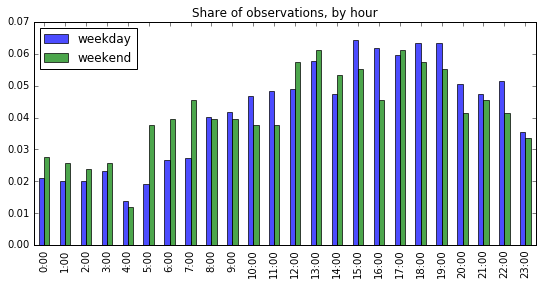

In [34]:
hourly_share = pd.DataFrame()

# calculate what share of the weekday observations each hour has
weekday_hourly = weekdays.groupby(weekdays.index.hour).size()
hourly_share['weekday'] = weekday_hourly / sum(weekday_hourly)

# calculate what share of the weekend observations each hour has
weekend_hourly = weekends.groupby(weekends.index.hour).size()
hourly_share['weekend'] = weekend_hourly / sum(weekend_hourly)

# format the x-axis ticks like 0:00 times and plot the data
hourly_share.index = [s + ':00' for s in hourly_share.index.astype(str)]
hourly_share.plot(figsize=[9, 4], kind='bar', stacked=False, alpha=0.7, title='Share of observations, by hour')

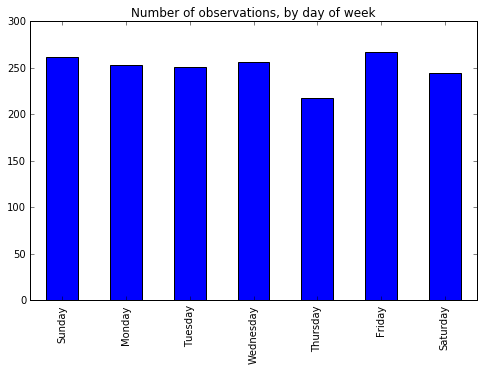

In [35]:
# calculate and plot the number of observations each day of the week has
daily_count = dt.groupby(dt.index.weekday).size()
daily_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_count.plot(figsize=[8, 5], kind='bar', title='Number of observations, by day of week')

# Part 4 <br /> map(), apply(), and applymap() in pandas

These methods are useful for mapping/applying a function across elements, rows, and columns of a pandas DataFrame or Series. But they have some important and often confusing differences.

1. map() applies a function element-wise on a Series
2. apply() works on a row or column basis on a DataFrame (specify the axis!), or on a row basis on a Series
3. applymap() works element-wise on an entire DataFrame

Let's see what that means in practice with some examples.

In [36]:
# create a new DataFrame with fake year data
df = pd.DataFrame({'start_year':[2001, 2002, 2005, 2005, 2006], 
                   'end_year':[2002, 2010, 2008, 2006, 2014]})
df

,end_year,start_year
0,2002,2001
1,2010,2002
2,2008,2005
3,2006,2005
4,2014,2006


In [37]:
# you can iterate through a DataFrame using the .iterrows() method
for _, row in df.iterrows():
    start_year = row['start_year']
    if start_year > 2004:
        print(start_year + 10)
    else:
        print(start_year)

2001
2002
2015
2015
2016


### alternatively, .map() applies a function element-wise on a Series

In [38]:
# create a function
def get_new_year(x):
    if x > 2004:
        return x + 10
    else:
        return x

# then map it to the series
df['start_year'].map(get_new_year)

0    2001
1    2002
2    2015
3    2015
4    2016
Name: start_year, dtype: int64

In [39]:
# or do the same thing all in one line, using a lambda function as .map()'s argument... you commonly see this in pandas
df['start_year'].map(lambda x: x + 10 if x > 2004 else x)

0    2001
1    2002
2    2015
3    2015
4    2016
Name: start_year, dtype: int64

A [lambda function](http://www.python-course.eu/lambda.php) is a simple, one-off, anonymous function. You can't call it again later because it doesn't have a name. It just lets you repeatedly perform some operation across a series of values (in our case, a column in our dataframe) using a minimal amount of code. Also notice that the if-else statement is all on one line: this is called a [ternary operator](http://pythoncentral.io/one-line-if-statement-in-python-ternary-conditional-operator/) or an inline-if.

In [40]:
# you can easily create a new column to contain the results of the function mapping
df['new_year'] = df['start_year'].map(get_new_year)
df.head()

,end_year,start_year,new_year
0,2002,2001,2001
1,2010,2002,2002
2,2008,2005,2015
3,2006,2005,2015
4,2014,2006,2016


### .apply() is like .map(), but it works on a row or column basis on an entire DataFrame (specify the axis)

In [41]:
# applies a function to calculate the difference between the min and max values in each column (ie, row-wise)
def get_difference(vector):
    difference = vector.max() - vector.min()
    return difference

df.apply(get_difference, axis=0)

end_year      12
start_year     5
new_year      15
dtype: int64

In [42]:
# same thing again, using a lambda function
df.apply(lambda x: x.max() - x.min(), axis=0)

end_year      12
start_year     5
new_year      15
dtype: int64

In [43]:
# here .apply() finds the difference between the min and max values in each row (ie, column-wise) and saves to a new column
df['difference'] = df.apply(get_difference, axis=1)
df

,end_year,start_year,new_year,difference
0,2002,2001,2001,1
1,2010,2002,2002,8
2,2008,2005,2015,10
3,2006,2005,2015,10
4,2014,2006,2016,10


### .applymap() works element-wise on an entire DataFrame
This is like doing a .map() to each column in the DataFrame

In [44]:
# divide every value in the dataframe by 2 (use a float so you don't do rounded integer division)
df.applymap(lambda x: x / 2.)

,end_year,start_year,new_year,difference
0,1001.0,1000.5,1000.5,0.5
1,1005.0,1001.0,1001.0,4.0
2,1004.0,1002.5,1007.5,5.0
3,1003.0,1002.5,1007.5,5.0
4,1007.0,1003.0,1008.0,5.0
